# Prediction Delivery Time

# EDA Dataset

## Explore

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

In [2]:
list1 =np.array(range(10))
list1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
df_ebay = pd.read_csv('../data/raw/ebayShort.csv', index_col=0)

As the data is too big, we first working in the shortcut of the total data with 1 million rows.

In [4]:
# Look at the first 5 row

df_ebay.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


In [5]:
#Look at 5 random row
df_ebay.sample(5)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
678198,C2C,88824,1.0,2018-07-31 12:57:00.000-05:00,2,19.95,2,9,56308,07461,0,79.99,1,2018-07-31 11:22:59.000-05:00,2018-08-06,112,1,PACKAGE_THICK_ENVELOPE,678199
462026,B2C,71234,1.0,2019-08-05 21:10:00.000-04:00,0,4.49,3,5,29172,23606,0,33.15,1,2019-08-04 19:29:24.000-04:00,2019-08-07,5,1,PACKAGE_THICK_ENVELOPE,462027
650383,C2C,308887,1.0,2019-05-28 13:56:00.000-04:00,0,5.00,3,5,33823,93551,0,15.00,1,2019-05-25 03:48:15.000-04:00,2019-05-30,10,1,PACKAGE_THICK_ENVELOPE,650384
31320,B2C,20484,NaN,2018-12-13 13:35:00.000-05:00,0,3.50,3,5,47909,80602,4,15.00,1,2018-12-09 20:35:14.000-05:00,2018-12-17,2,1,PACKAGE_THICK_ENVELOPE,31321
963493,B2C,179104,2.0,2019-10-26 11:46:00.000-04:00,1,0.00,2,5,19050,07104,9,62.00,1,2019-10-25 08:46:59.000-04:00,2019-10-28,0,1,PACKAGE_THICK_ENVELOPE,963494


In [6]:
#check the shape of the dataset
df_ebay.shape

(1000000, 19)

In [7]:
print(f'There are {df_ebay.shape[0]} columns and {df_ebay.shape[1]} rows')

There are 1000000 columns and 19 rows


In [8]:
# Get a quick overview of dataset variables
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   b2c_c2c                    1000000 non-null  object 
 1   seller_id                  1000000 non-null  int64  
 2   declared_handling_days     952820 non-null   float64
 3   acceptance_scan_timestamp  1000000 non-null  object 
 4   shipment_method_id         1000000 non-null  int64  
 5   shipping_fee               1000000 non-null  float64
 6   carrier_min_estimate       1000000 non-null  int64  
 7   carrier_max_estimate       1000000 non-null  int64  
 8   item_zip                   1000000 non-null  object 
 9   buyer_zip                  1000000 non-null  object 
 10  category_id                1000000 non-null  int64  
 11  item_price                 1000000 non-null  float64
 12  quantity                   1000000 non-null  int64  
 13  payment_datet

In [9]:
# top 5 rows showing only 'object' columns
df_ebay.select_dtypes('object').head()

,b2c_c2c,acceptance_scan_timestamp,item_zip,buyer_zip,payment_datetime,delivery_date,package_size
0,B2C,2019-03-26 15:11:00.000-07:00,97219,49040,2019-03-24 03:56:49.000-07:00,2019-03-29,LETTER
1,C2C,2018-06-02 12:53:00.000-07:00,11415-3528,62521,2018-06-01 13:43:54.000-07:00,2018-06-05,PACKAGE_THICK_ENVELOPE
2,B2C,2019-01-07 16:22:00.000-05:00,27292,53010,2019-01-06 00:02:00.000-05:00,2019-01-10,PACKAGE_THICK_ENVELOPE
3,B2C,2018-12-17 16:56:00.000-08:00,90703,80022,2018-12-16 10:28:28.000-08:00,2018-12-21,PACKAGE_THICK_ENVELOPE
4,B2C,2018-07-27 16:48:00.000-07:00,90703,55070,2018-07-26 18:20:02.000-07:00,2018-07-30,PACKAGE_THICK_ENVELOPE


<Figure size 1400x2600 with 0 Axes>

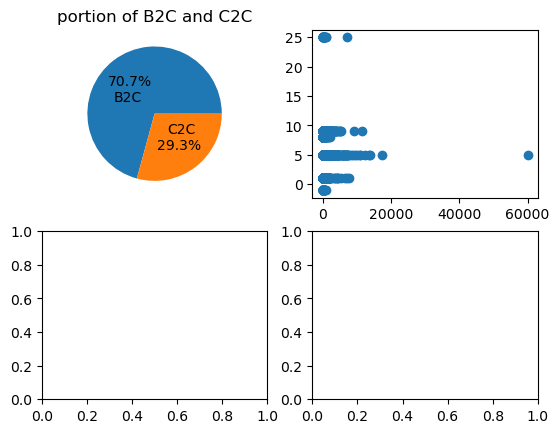

In [10]:
plt.figure(figsize=(14, 26))
plt.subplots(2, 2)

plt.subplot(2, 2, 1)
plt.pie(df_ebay['b2c_c2c'].value_counts(), labels= df_ebay['b2c_c2c'].unique(), labeldistance=0.3, autopct='%1.1f%%')
plt.title('portion of B2C and C2C')

plt.subplot(2, 2, 2)
plt.scatter( df_ebay['item_price'], df_ebay['carrier_max_estimate'])

plt.show()

## Data Cleaning

First let do some common checking in the dataset.
 -  Null value
 -  Duplicate row

In [11]:
#Checking null
df_ebay.isna().sum()

b2c_c2c                          0
seller_id                        0
declared_handling_days       47180
acceptance_scan_timestamp        0
shipment_method_id               0
shipping_fee                     0
carrier_min_estimate             0
carrier_max_estimate             0
item_zip                         0
buyer_zip                        0
category_id                      0
item_price                       0
quantity                         0
payment_datetime                 0
delivery_date                    0
weight                           0
weight_units                     0
package_size                     0
record_number                    0
dtype: int64

There is 47180 missing value in total 1 million rows. We could delete it but I decide to have deepper look at it later


In [12]:
# checking duplicate rows
df_ebay.duplicated().any()

False

There are no duplicate row in the database

In [13]:
#recall shape column
df_ebay.shape[1]

19

Let check out the distributions, we are going to loop over the columns and print some subplot.

In [14]:
#checking the b2c_c2c column
df_ebay['b2c_c2c'].value_counts()

B2C    707485
C2C    292515
Name: b2c_c2c, dtype: int64

Convert `b2c_c2c` column to binary

In [15]:
df_ebay['b2c_c2c']= np.where(df_ebay['b2c_c2c']=='B2C', 1, 0)

Test it

In [16]:
df_ebay.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,1,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,0,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,1,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,1,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,1,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


There is 2 `weight_units` is 1 and 2. Let say 1 - 's' and 2 - 'kg'. We are going to convert all the weight units to lb.

In [17]:
#check the record has weigtht unit =2 to able to compare
df_ebay[df_ebay['weight_units']==2].head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
115821,1,46815,1.0,2018-01-29 10:06:00.000-06:00,0,0.0,3,5,35503,30605,1,6.89,2,2018-01-28 20:18:59.000-06:00,2018-01-31,113,2,LARGE_ENVELOPE,115822
847218,1,40624,1.0,2019-10-03 13:18:00.000-05:00,2,0.0,2,9,63044,85715,6,26.99,1,2019-10-03 01:28:56.000-05:00,2019-10-10,0,2,NONE,847219
908707,0,295500,1.0,2018-03-21 14:00:00.000-04:00,5,7.0,2,5,02050,02109,1,29.30,1,2018-03-04 08:51:33.000-05:00,2018-03-07,13,2,LARGE_ENVELOPE,908708


In [18]:
df_ebay['weight'] = np.where(df_ebay['weight_units']==1, df_ebay['weight'], df_ebay['weight']*2.20462 )

check the record with `weight_units`=2 to see if the `weight` column is change

In [19]:
df_ebay[df_ebay['weight_units']==2]

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
115821,1,46815,1.0,2018-01-29 10:06:00.000-06:00,0,0.0,3,5,35503,30605,1,6.89,2,2018-01-28 20:18:59.000-06:00,2018-01-31,249.12206,2,LARGE_ENVELOPE,115822
847218,1,40624,1.0,2019-10-03 13:18:00.000-05:00,2,0.0,2,9,63044,85715,6,26.99,1,2019-10-03 01:28:56.000-05:00,2019-10-10,0.00000,2,NONE,847219
908707,0,295500,1.0,2018-03-21 14:00:00.000-04:00,5,7.0,2,5,02050,02109,1,29.30,1,2018-03-04 08:51:33.000-05:00,2018-03-07,28.66006,2,LARGE_ENVELOPE,908708


Now  we change the `weight_units` column all to the same unit

In [20]:
df_ebay['weight_units']= np.where(df_ebay['weight_units']== 2, 1, 1)


In [21]:
#check
df_ebay[df_ebay['weight_units']==2].value_counts()

Series([], dtype: int64)

In [22]:
df_ebay['item_zip'].isna().any()

False

In [39]:
item_zip= df_ebay['item_zip']
buyer_zip= df_ebay['buyer_zip']

In [24]:
# #calculate distance between 2 zip code
country = Nominatim(user_agent="US")
distance= []
def distance_cal(item_zip, buyer_zip):
# for i in range(len(buyer_zip)):
    if buyer_zip and item_zip:
        location1= country.geocode(item_zip)
        location2= country.geocode(buyer_zip)
        if location1 is None or location2 is None:
            return None
        lat1 = location1.latitude 
        lon1 = location1.longitude
        lat2 = location2.latitude
        lon2 = location2.longitude
        # distance between them
        if lat1 is not None or lon1 is not None or lat2 is not None or lon2 is not None:
            return geodesic((lat1, lon1), (lat2, lon2)).miles
        else:
            return None
    else:
        return None   

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=62521&format=json&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x10b66d780>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [25]:
def add_distance_col(item_zip, buyer_zip):
    item = item_zip.apply(lambda x: str(x))
    buyer = buyer_zip.apply(lambda x: str(x))

    zips= pd.concat([item, buyer], axis=1)
    zips['distance']= zips.apply(lambda x: distance_cal(x.item_zip, x.buyer_zip), axis=1)
    return(zips)

In [40]:
add_distance_col(item_zip, buyer_zip)

KeyboardInterrupt: 

In [37]:
import mpu
from uszipcode import SearchEngine

def get_distance(item_zip, buyer_zip):
    """
    Haversine formula using 'mpu' library which determines the
    great-circle distance between two points on a sphere.
    """
    if item_zip is not None and buyer_zip is not None:
        search = SearchEngine()

        zip1 = search.by_zipcode(item_zip[0:5])
        lat1 =zip1.lat
        long1 =zip1.lng
        zip2 =search.by_zipcode(buyer_zip[0:5])
        lat2 =zip2.lat
        long2 =zip2.lng
        if lat1 is None or lat2 is None or long1 is None or long2 is None:
            lat1, long1 = z.zip_to_central_lat_lon(int(item_zip))
            lat2, long2 = z.zip_to_central_lat_lon(int(buyer_zip))
        return mpu.haversine_distance((lat1,long1),(lat2,long2)) 
    else:
        return None


def add_zip_distance_column(item_zip, buyer_zip):
    item_zip_str = item_zip.apply(lambda x: str(x))
    buyer_zip_str = buyer_zip.apply(lambda x: str(x))

    zips = pd.concat([item_zip_str, buyer_zip_str], axis=1)

    zips['distance'] = zips.apply(lambda x: get_distance(x.item_zip, x.buyer_zip), axis=1)
    
    return zips['distance']

In [41]:
add_zip_distance_column(item_zip, buyer_zip)

AttributeError: 'NoneType' object has no attribute 'lat'

Then create the distance column and add the distance value in this column. Also delete the `buyer_zip` and `item_zip` column.